* Unifacisa Centro Universitario
* Pós-Graduação em Ciência de Dados
* Disciplina: Machine learning 
* Professor: Talita Lobo
* Aluno: Joanes Miranda de Souto, RA: POS1690007

In [0]:
import pandas as pd # para criação do data frame
from sklearn.model_selection import train_test_split # para separação dos conjuntos de treino e teste
from sklearn.linear_model import LogisticRegression # para construção do modelo de Regressão Logística
from sklearn import metrics # para computação das métricas de avaliação
from sklearn.metrics import confusion_matrix
import seaborn as sn # para visualização dos resultados


Dataset: Titanic
Dados
* PassengerId: Número de identificação do passageiro; 
* Survived: Indica se o passageiro sobreviveu ao desastre. É atribuído o valor de 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu;
* Pclass: Classe na qual o passageiro viajou. É informado 1 para primeira  classe; 2 para segunda; e 3 para terceira;
* Name: Nome do passageiro;
* Sex: Sexo do passageiro;
* Age: Idade do passageiro em anos;
* SibSp: Quantidade de irmãos e cônjuges a bordo ;
* Parch: Quantidade de pais e filhos a bordo;
* Ticket: Número da passagem;
* Fare: Preço da passagem;
* Cabin: Número da cabine do passageiro;
* Embarked: Indica o porto no qual o passageiro embarcou. Há apenas três valores possíveis: Cherbourg, Queenstown e Southampton, indicados pelas letras “C”, “Q” e “S”, respectivamente.

In [0]:
# Importando os dados sobre os passageiros do Titanic
dataset = pd.read_csv('titanic3.csv')

In [3]:
#exibindo as 5 primeiras linhas da base
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
dataset.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
#exibindo o tamanho das linhas e colunas da base
dataset.shape

(1309, 14)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
#quantidade de valores nulos nas colunas
dataset.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [0]:
#adicionado a media dos valores nas colunas com dados nulos
dataset_imputted = dataset.fillna(dataset.mean())

In [9]:
dataset_imputted.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body            0
home.dest     564
dtype: int64

In [10]:
dataset_imputted.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [11]:
#verificando a correlação dos dados
dataset_imputted.corr().round(3)

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000,-0.312,-0.366,0.061,0.018,-0.558,-0.011
survived,-0.312,1.000,-0.050,-0.028,0.083,0.244,0.000
age,-0.366,-0.050,1.000,-0.191,-0.131,0.172,0.020
sibsp,0.061,-0.028,-0.191,1.000,0.374,0.160,-0.026
parch,0.018,0.083,-0.131,0.374,1.000,0.222,0.015
fare,-0.558,0.244,0.172,0.160,0.222,1.000,-0.011
body,-0.011,0.000,0.020,-0.026,0.015,-0.011,1.000


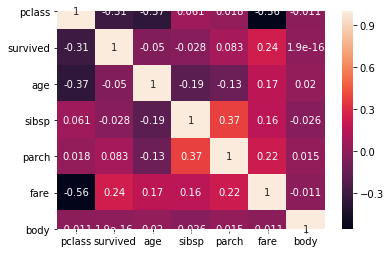

In [12]:
#gera o grafico de mapa de calor da correlação do dados
sn.heatmap(dataset_imputted.corr(), annot=True)

In [13]:
# Contagem dos passageiros por classe 
dataset_imputted["pclass"].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

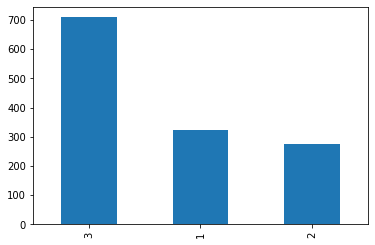

In [14]:
# Gráfico de barras sobre o número de passageiros em cada classe
dataset_imputted["pclass"].value_counts().plot(kind="bar")

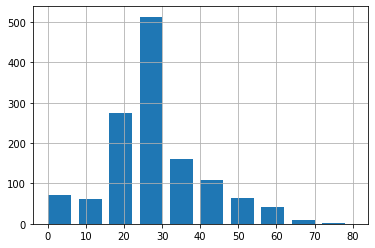

In [15]:
# Histograma da distribuição de idade dos passageiros
dataset_imputted["age"].hist(width=6)

In [0]:
def survival_stacked_bar(variable):
    Died = dataset_imputted[dataset_imputted["survived"]==0][variable].value_counts()/len(dataset_imputted["survived"]==0)
    Survived = dataset_imputted[dataset_imputted["survived"]==1][variable].value_counts()/len(dataset_imputted["survived"]==1)
    
    data = pd.DataFrame([Died,Survived])
    data.index=["Não sobreviveu","Sobreviveu"]
    data.plot(kind="bar",stacked=True,title="Porcentagem")
    
    return data.head()

,1,2,3
Não sobreviveu,0.093965,0.120703,0.403361
Sobreviveu,0.152788,0.090909,0.138273


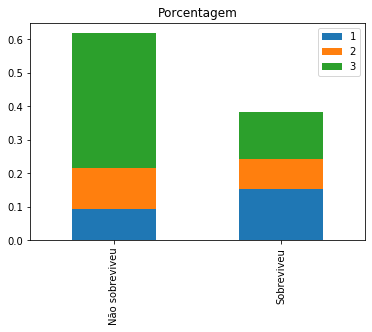

In [17]:
# Utiliza a função criada acima com a variável Classe
survival_stacked_bar("pclass")

,0,1,2,3,4,5,8
Não sobreviveu,0.444614,0.119175,0.017571,0.010695,0.014515,0.004584,0.006875
Sobreviveu,0.236058,0.124523,0.014515,0.004584,0.002292,NaN,NaN


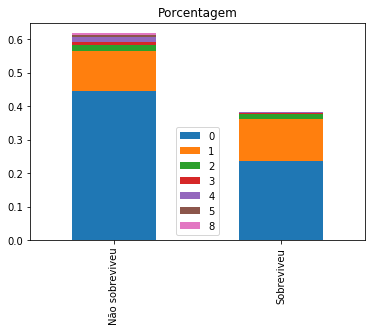

In [18]:
# Utiliza a função criada acima com a variável sibsp
survival_stacked_bar("sibsp")

**Regressão Logística**

In [0]:
#definindo os preditores e alvo
preditores = dataset_imputted[['pclass', 'survived', 'sibsp', 'parch']]
alvo = dataset_imputted['survived']

In [0]:
# Divisão dos conjuntos de treino e teste
preditores_treino, preditores_teste, alvo_treino, alvo_teste = train_test_split(preditores, alvo, test_size=0.30, random_state=0)

In [21]:
# Instancia o modelo de regressão logística com parâmetros default
modelo_reglog = LogisticRegression()

# Treina o modelo com base nos preditores e variável alvo
modelo_reglog.fit(preditores_treino, alvo_treino)

# Prevê, para os dados do conjunto de teste, resultados para a variável alvo
alvo_pred = modelo_reglog.predict(preditores_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
# Matriz de confusão
print(confusion_matrix(alvo_teste, alvo_pred))

[[246   0]
 [  0 147]]


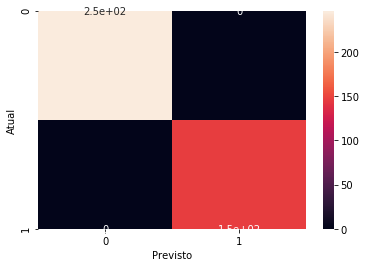

In [23]:
matriz_confusao = pd.crosstab(alvo_teste, alvo_pred, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao, annot=True)

In [24]:
# Acurácia do modelo
print('Acurácia: ', metrics.accuracy_score(alvo_teste, alvo_pred))

Acurácia:  1.0


In [25]:
#Métricas de Avaliação
print('Precisão: ', metrics.precision_score(alvo_teste, alvo_pred))

print('Revocação: ', metrics.recall_score(alvo_teste, alvo_pred))

print('F1-Measure: ', metrics.f1_score(alvo_teste, alvo_pred))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, alvo_pred))

Precisão:  1.0
Revocação:  1.0
F1-Measure:  1.0
ROC AUC:  1.0


In [26]:
print(alvo_teste)
print(alvo_pred)

1139    0
533     1
459     0
1150    0
393     0
       ..
914     0
580     1
1080    1
1249    0
88      1
Name: survived, Length: 393, dtype: int64
[0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0
 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1]


**Árvore de Decisão**

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Cria uma instância default
dt = DecisionTreeClassifier()

# Treina o modelo com os dados dos alunos
arvore_decisao = dt.fit(preditores_treino, alvo_treino)

In [0]:
# Realiza a previsão nos dados de teste
arvore_previsao = arvore_decisao.predict(preditores_teste)

In [29]:
print("Acurácia: ", metrics.accuracy_score(alvo_teste, arvore_previsao))
print('Precisão: ', metrics.precision_score(alvo_teste, arvore_previsao))
print('Revocação: ', metrics.recall_score(alvo_teste, arvore_previsao))
print('F1-Measure: ', metrics.f1_score(alvo_teste, arvore_previsao))
print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, arvore_previsao))

Acurácia:  1.0
Precisão:  1.0
Revocação:  1.0
F1-Measure:  1.0
ROC AUC:  1.0


[[246   0]
 [  0 147]]


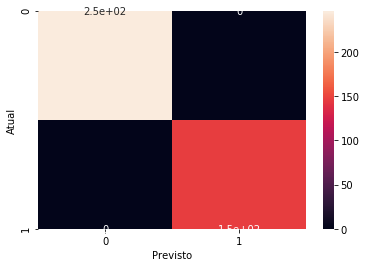

In [30]:
# Matriz de Confusão
print(confusion_matrix(alvo_teste, arvore_previsao))
matriz_confusao_arvore = pd.crosstab(alvo_teste, arvore_previsao, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao_arvore, annot=True)